# Task : 1 Titanic Survival Prediction

#### Data Science Internship at CodeSoft

> Author : Sakshi Deshmukh

> Batch : July-August2024

> Domain : Data Science
>
> ---

### Task : TITANIC SURVIVAL PREDICTION

- Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data. 
- The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.



## Data Description

- **pclass**: A proxy for socio\-economic status \(SES\)
- - 1st = Upper
  - 2nd = Middle
  - 3rd = Lower
- **age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- **sibsp**: The dataset defines family relations in this way...
- - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife \(mistresses and fiancés were ignored\)
- **parch**: The dataset defines family relations in this way...
- - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.



In [63]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading Dataset
titanic_data = pd.read_csv("Titanic-Dataset.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Age and Cabin has Null values or blank....

In [9]:
#  we will fill blank with median value
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

In [10]:
# Count the Embarked
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
# replace blanks with mode value
titanic_data['Embarked'].fillna('S', inplace=True)

In [12]:
# check Null value in data
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [13]:
# In fare column has also null value, replace with  median
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

In [62]:
# We will remove the "Cabin" column because it contains a significant number of missing values.
titanic_data.drop(columns="Cabin", inplace=True)

In [15]:
# Last check null value and Dataset
print(titanic_data.isnull().sum())
print(titanic_data.head())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599

## Now Data is Cleaned...

# Exploratory Data Analysis 

 survival variable describe as

No = 0 , Yes = 1

In [24]:
import seaborn as sns

In [25]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

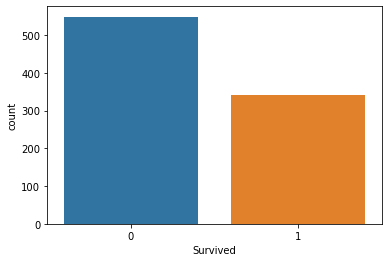

In [26]:
sns.countplot(data=titanic_data,x='Survived')

# Pclass data describe as:

- 1st = Upper
- 2nd = Middle
- 3rd = Lower



<AxesSubplot:xlabel='Pclass', ylabel='count'>

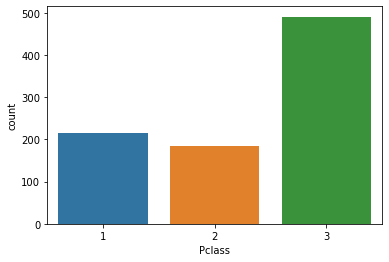

In [27]:
sns.countplot(data=titanic_data,x='Pclass')

<AxesSubplot:xlabel='Sex', ylabel='count'>

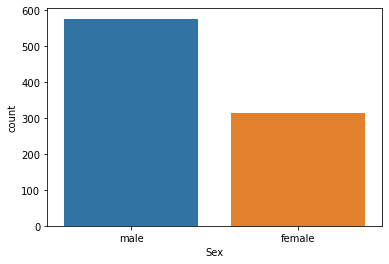

In [28]:
sns.countplot(data=titanic_data,x='Sex')

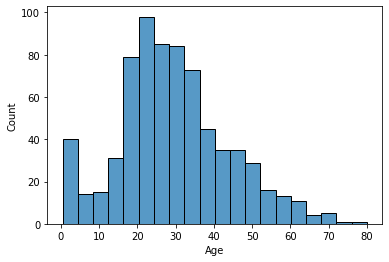

In [33]:
sns.histplot(data=titanic_data, x='Age')
plt.show()

# Show count of survival wrt pclass

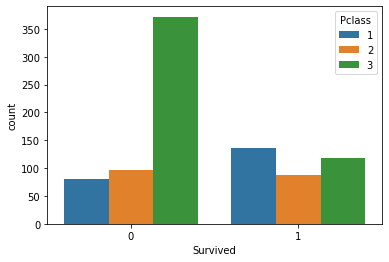

In [34]:
sns.countplot(x=titanic_data['Survived'], hue=titanic_data['Pclass'])
plt.show()

# Show count of survival wrt gender

In [35]:
titanic_data['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

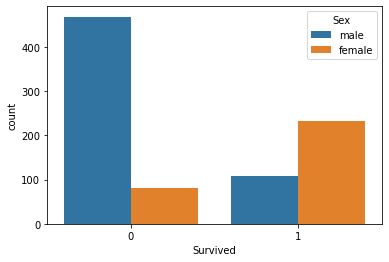

In [36]:
sns.countplot(x=titanic_data['Survived'], hue=titanic_data['Sex'])
plt.show()

# show survival wrt Age

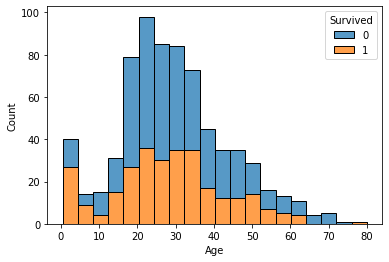

In [37]:
sns.histplot(x=titanic_data['Age'], hue=titanic_data['Survived'], multiple='stack')
plt.show()

# show survived wrt Embarked..
Port of Embarkation	

- C = Cherbourg,
- Q = Queenstown, 
- S = Southampton



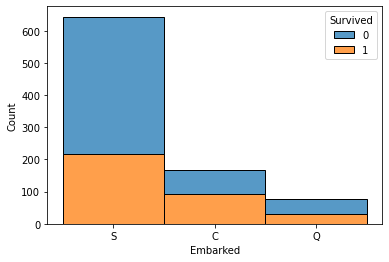

In [38]:
sns.histplot(x=titanic_data['Embarked'], hue=titanic_data['Survived'], multiple='stack')
plt.show()

# Show survival wrt to Fare


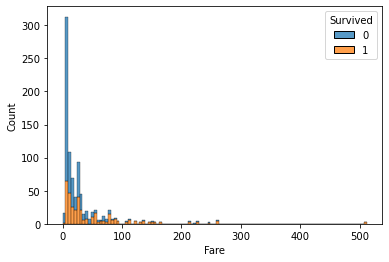

In [40]:
sns.histplot(x=titanic_data['Fare'], hue=titanic_data['Survived'], multiple='stack')
plt.show()

# Featuring Engineering



#### before modeling the data, transform gender\(Sex\) into numeric

- Male \- 1
- Female \- 0

**Use LabelEncoder from sklearn library**



In [42]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
titanic_data['Sex'] = labelencoder.fit_transform(titanic_data['Sex'])

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


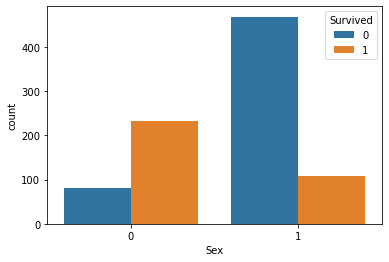

In [43]:
sns.countplot(x=titanic_data['Sex'],hue=titanic_data['Survived'])
plt.show()


**Drop unneccasey column for modeling**


In [45]:
titanic_data.drop(columns=["PassengerId","Name","SibSp","Parch","Ticket","Fare","Age", "Embarked"],inplace=True)

In [46]:
titanic_data.head()

,Survived,Pclass,Sex,Cabin
0,0,3,1,NaN
1,1,1,0,C85
2,1,3,0,NaN
3,1,1,0,C123
4,0,3,1,NaN


# Modelling

In [47]:
X=titanic_data[['Sex', 'Pclass']]
Y=titanic_data['Survived']

**Split data into test and train by using Sklearn library**


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

**Create training Model**

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
log = LogisticRegression(random_state = 0)
log.fit(X_train, Y_train)

LogisticRegression(random_state=0)

**Create Prediction model**

In [50]:
pred = log.predict(X_test)
pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [51]:
print("Accuracy_score :", accuracy_score(Y_test, pred))
print("Matrix :",confusion_matrix(Y_test,pred))

Accuracy_score : 0.7877094972067039
Matrix : [[92 18]
 [20 49]]


In [52]:
Y_test

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64

In [59]:
submission=X.iloc[:,:].values
y_final=log.predict(submission)

In [54]:
y_final.shape

(891,)

In [55]:
final = pd.DataFrame()
final["Sex"]= X['Sex']
final["survived"]=y_final

In [57]:
final.to_csv("submission.csv",index=False)

**Trainig is completed, now check**

**Trainig is completed, now check**

In [61]:
import warnings
warnings.filterwarnings("ignore")

result = log.predict([[5,0]])
if(result == 0):
    print("So Sorry, Not Survived")
else:
    print("Survived")

So Sorry, Not Survived
